## refine shoreline example

imports 

In [1]:
import extract_boundary 
import refine_boundary

import matplotlib.pyplot as plt
import numpy as np

extract shoreline input

In [2]:
#load an image from the folder
mask_filepath = 'sample/20241211T052119_20241211T052515_T43NCE_mask.png'

extract an intial boundary (along with a buffer used for some of the refinement options).
I am thinking this will move into the refine shoreline class...

In [3]:
shoreline, buffer, shoreline_filepath = extract_boundary.get_shoreline(mask_filepath,simplification=0.5,smoothing=2)

refine shoreline inputs

In [4]:
img_path = 'sample/20241211T052119_20241211T052515_T43NCE_sr.png'
boundary_path = 'sample/20241211T052119_20241211T052515_T43NCE_mask_sl.csv'

### refine shoreline - slope

initialize refiner

In [5]:
refiner = refine_boundary.boundary_refine(boundary_path, img_path)

run the shore-normal refinement (one type of refinement)

In [6]:
refiner.normal_thresholding()

'sample/20241211T052119_20241211T052515_T43NCE_mask_rl.csv'

## visualize output - including process steps

In [7]:
#original shoreling
shoreline = refiner.shoreline
# points from nurbs curve
cp_arr = refiner.crv_pts
#refined shoreline
bd_arr = refiner.refined_boundary
#image used for sampling
img_arr = np.array(refiner.img)
#sampled values
sampled_nir = refiner.sample_values

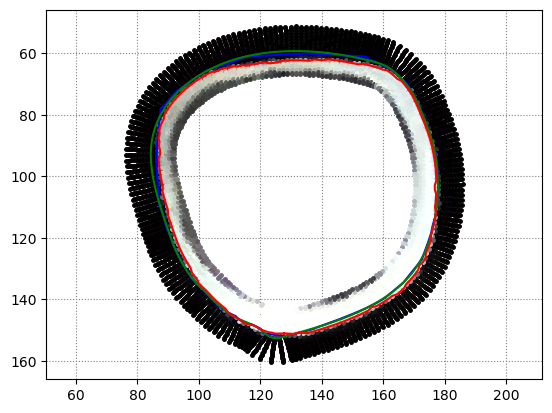

In [8]:
plt.axis('equal')
plt.rcParams['figure.figsize'] = [25, 25]
plt.grid(linestyle=':', color='0.5') 
plt.gca().invert_yaxis()
#plt.imshow(img_arr) # check alignment with original image

for t_s in sampled_nir:
    for pt in t_s:
        pixel = np.array([pt[2][0]/255,pt[2][1]/255,pt[2][2]/255])
        plt.plot(pt[0], pt[1], '.',ms=5,color=pixel)

plt.plot(shoreline[:,0],shoreline[:,1],color='blue')
plt.plot(cp_arr[:,0],cp_arr[:,1],color='green')
plt.plot(bd_arr[:,0],bd_arr[:,1],color='red')

plt.show()